In [1]:
import pandas as pd
from utils import make_connection

In [2]:
wh_conn = make_connection(config_file = 'dw_config.ini')
wh_cursor = wh_conn.cursor()

Connection successful


In [16]:
# Fetching all_restaurants table data
top_3_appetizers = '''
                SELECT 
    m.menu_id,
    m.item_name,
    ROUND(AVG(m.rating), 2) as average_rating
FROM 
    menu_dim AS m
JOIN 
    sales_fact AS s ON m.menu_id = s.menu_id
WHERE 
    m.category = 'Appetizer'
GROUP BY 
    m.menu_id, 
    m.item_name
ORDER BY 
    average_rating DESC
LIMIT 3;
                '''

wh_cursor.execute(top_3_appetizers)

rows  = wh_cursor.fetchall()
count = wh_cursor.rowcount
print(count)

3


In [17]:
# Creating dataframe of all_restaurants data
top_3_appetizers_df = pd.DataFrame(rows)

num_fields = len(wh_cursor.description)
field_names = [i[0] for i in wh_cursor.description]
field_names

top_3_appetizers_df.columns = field_names
top_3_appetizers_df.head()

,menu_id,item_name,average_rating
0,9,Pani Puri,4.00
1,19,Chana Chaat,4.00
2,3,Aloo Tikki (potato patties),3.67


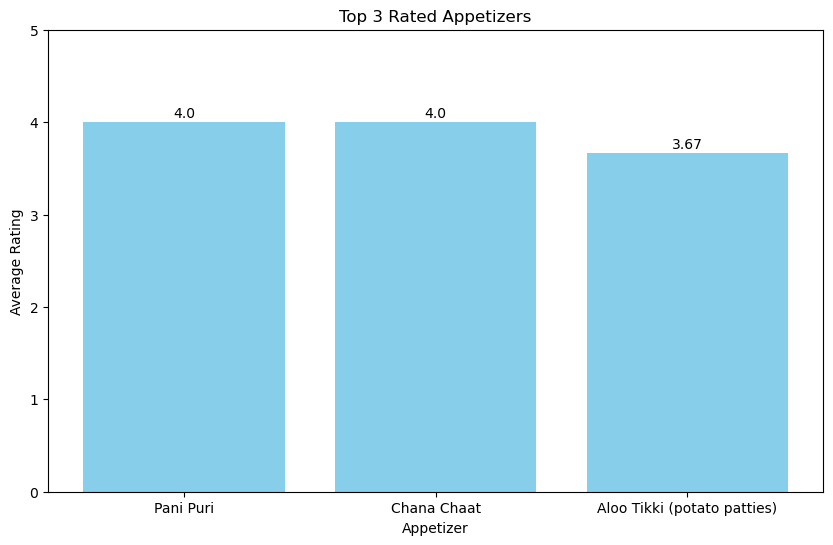

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

data = top_3_appetizers_df[['item_name', 'average_rating']]

# # Sample DataFrame
# data = {
#     'item_name': ['Appetizer A', 'Appetizer B', 'Appetizer C'],
#     'average_rating': [4.5, 4.3, 4.2]
# }
top_appetizers = pd.DataFrame(data)

# Now, let's plot the data
plt.figure(figsize=(10, 6))
plt.bar(top_appetizers['item_name'], top_appetizers['average_rating'], color='skyblue')

# Adding titles and labels
plt.title('Top 3 Rated Appetizers')
plt.xlabel('Appetizer')
plt.ylabel('Average Rating')
plt.ylim(0, 5)  # Assuming the rating is out of 5

# Display the average rating above each bar
for i in range(len(top_appetizers)):
    plt.text(i, top_appetizers['average_rating'][i] + 0.05, top_appetizers['average_rating'][i], ha = 'center')

# Show the plot
plt.show()